# Bike Sharing Assignment 
## using multiple linear regression

#### Problem Statement:


Essentially, the company wants —

Build a model that finds the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

- To identify the variables affecting bike demand, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates bike demand with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict bike demand.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the given dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### By looking at the data and data dictionary, we can remove below features

In [8]:
df = df.drop('casual', 1)
df = df.drop('registered', 1)
df = df.drop('instant', 1)

### Deriving new variable
#### Formula for Heat Index (HI) = c1 + c2T + c3R + c4TR + c5T2 + c6R2 + c7T2R + c8TR2 + c9T2R2 
#### where as c1 to c9 values are 
#### c1	-42.379
#### c2	-2.04901523
#### c3	-10.14333127
#### c4	-0.22475541
#### c5	-6.83783 x 10−3
#### c6	-5.481717 x 10−2
#### c7	-1.22874 x 10−3
#### c8	8.5282 x 10−4
#### c9	-1.99 x 10−6

#### HI	the heat index (in degrees Fahrenheit),  T	ambient temperature in Fahrenheit and R	relative humidity

In [15]:
# atemp is in celsius. So, need to convert it into Fahrenheit as above formula expects it that way.

df['atemp_f'] = df['atemp'] * 1.8000 + 32.00


In [16]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,atemp_f
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,64.72625
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,63.83651
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,49.04645
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,51.09098
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,52.63430


In [31]:
# Heat Index (HI) = c1 + c2T + c3R + c4TR + c5T2 + c6R2+c7T2R+c8TR2+ c9T2R2

# HI = -42.379 + -2.04901523 x 185 + -10.14333127 x 86 + -0.22475541 x 185 x 86 + -6.83783 x 10−3 x (185)2+-5.481717 x 10−2 x (86)2+ -1.22874 x 10−3 x (185)2× 86 + 8.5282 x 10−4 x 185 x (86)2 + -1.99 x 10−6 x (185)2 x (86)2

df['heat_index_f'] = (0-42.379) - (2.04901523 * df['atemp_f']) - (10.14333127 * df['hum']) - (0.22475541 * df['atemp_f'] * df['hum']) - (6.83783 * pow(10,-3) * pow(df['atemp_f'],2)) - (5.481717 * pow(10,-2) * pow(df['hum'],2)) - (1.22874 * pow(10,-3) * pow(df['atemp_f'],2) * df['hum']) + (8.5282 * pow(10,-4) * df['atemp_f'] * pow(df['hum'],2)) - (1.99 * pow(10,-6) * pow(df['atemp_f'],2) * pow(df['hum'],2))

In [39]:
df['heat_index_c'] = (df['heat_index_f'] - 32.00) / 1.8000

In [40]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,atemp_f,heat_index_f,heat_index_c
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,64.72625,-2659.805037,-1495.447243
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,63.83651,-2295.490852,-1293.050473
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,49.04645,-1248.130190,-711.183439
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,51.09098,-1688.493630,-955.829795
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,52.63430,-1307.531829,-744.184349


In [42]:
# We have temp, atemp which are almost similar data. Where as temp is actual and atemp is felt by people. 
# So, its better to consider atemp instead of temp
df = df.drop('temp', 1)

In [43]:
# We have dteday as a feature, But all the info from date which are already available from other features.
# So, its better to remove dteday
df = df.drop('dteday', 1)

In [44]:
# I have created atemp_f heat_index_f just for temporary basis
# So, can drop these two
df = df.drop('atemp_f', 1)
df = df.drop('heat_index_f', 1)

In [48]:
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_cat = df[cat_vars]

In [50]:
num_vars = ['atemp', 'hum', 'windspeed', 'heat_index_c']
df_num = df[num_vars]

## Step 2: Visualising the Data
## Step 3: Data Preparation
- Encoding:
  - Converting binary vars to 1/0 But we dont have any as such
  - Other categorical vars to dummy vars

### Visualizing the numerical variables along with heat_index

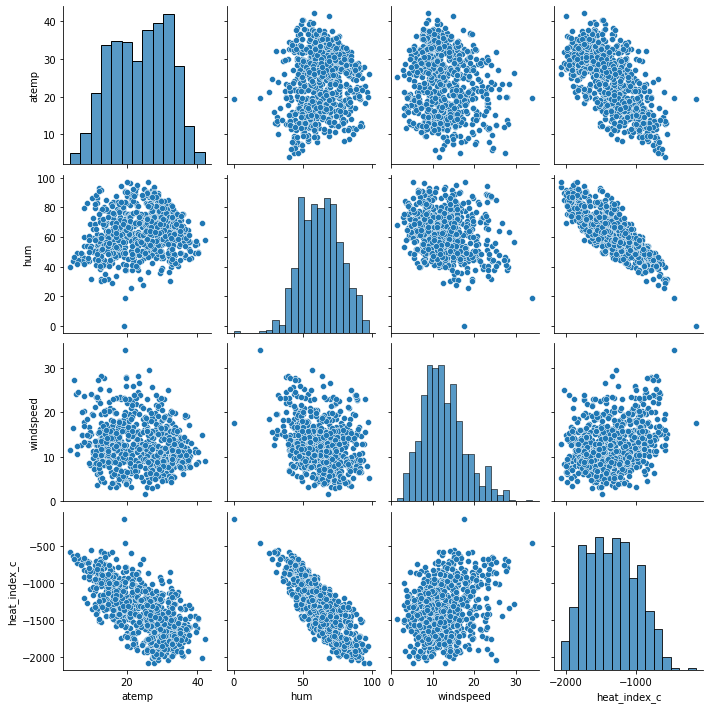

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_num)
plt.show()

### Visualizing the categorical variables

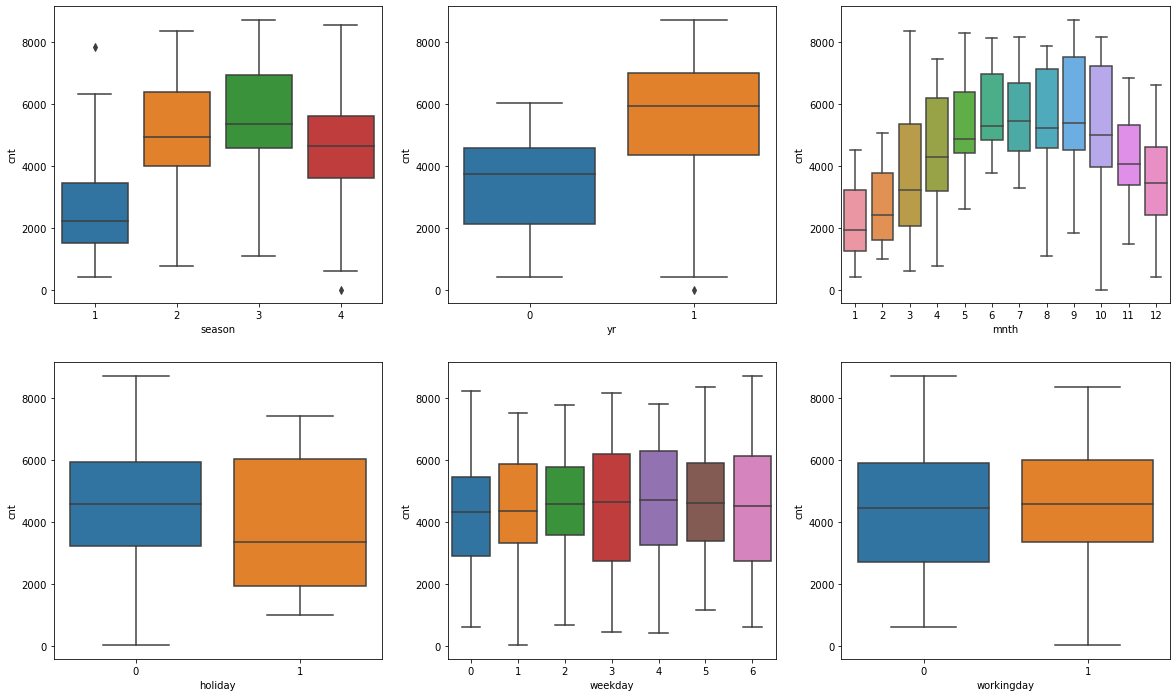

In [52]:
# season yr mnth holiday weekday workingday
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)


plt.show()

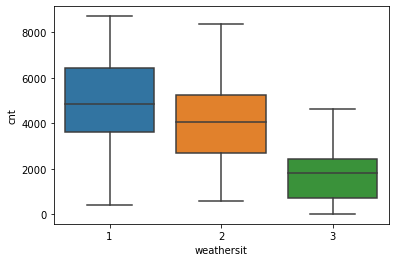

In [53]:
# weathersit
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

In [54]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,heat_index_c
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,-1495.447243
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,-1293.050473
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,-711.183439
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,-955.829795
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,-744.184349


In [56]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [57]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [59]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [58]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Dummies have to be created for all the above features - season, mnth, weekday, weathersit

In [60]:
# Making dummies for season
season = pd.get_dummies(df['season'], drop_first = True)

In [61]:
season.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace = True)
season

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [62]:
# Making dummies for months
months = pd.get_dummies(df['mnth'], drop_first = True)

In [63]:
months.rename(columns = {2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)
months

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [64]:
# Making dummies for weekday
weekdays = pd.get_dummies(df['weekday'], drop_first = True)

In [66]:
weekdays.rename(columns = {1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace = True)
weekdays

,mon,tue,wed,thu,fri,sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [67]:
# weathersit
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

In [68]:
weathersit.rename(columns = {2:'mist_cloudy', 3:'light_rain'}, inplace = True)
weathersit

,mist_cloudy,light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [69]:
# concat the dummy data frames with the original one
df = pd.concat([df, season, months, weekdays, weathersit], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,nov,dec,mon,tue,wed,thu,fri,sat,mist_cloudy,light_rain
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


In [70]:
# remove the original columns because we created dummies out of them
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

In [71]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,heat_index_c,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist_cloudy,light_rain
0,0,0,0,18.18125,80.5833,10.749882,985,-1495.447243,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,-1293.050473,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,-711.183439,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,-955.829795,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,-744.184349,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

Main step for regression is performing a train-test split.
- Splitting into train and test
- Rescaling of variables

### Splitting into train and test

In [72]:
import sklearn
from sklearn.model_selection import train_test_split

In [73]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [74]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,heat_index_c,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist_cloudy,light_rain
653,1,0,1,23.0423,55.8333,12.208807,7534,-1183.132899,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,-1765.902673,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,-1239.880545,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,11.5850,48.3333,23.500518,1796,-815.464121,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,-967.242336,1,0,...,0,0,0,0,0,0,0,1,1,0


### Rescaling of variables

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'heat_index_c']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [77]:
df_train[num_vars].describe()

,atemp,hum,windspeed,heat_index_c
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.374059
std,0.212385,0.145882,0.169797,0.184532
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.225478
50%,0.526811,0.653714,0.296763,0.376172
75%,0.688457,0.754830,0.414447,0.509871
max,1.000000,1.000000,1.000000,1.000000


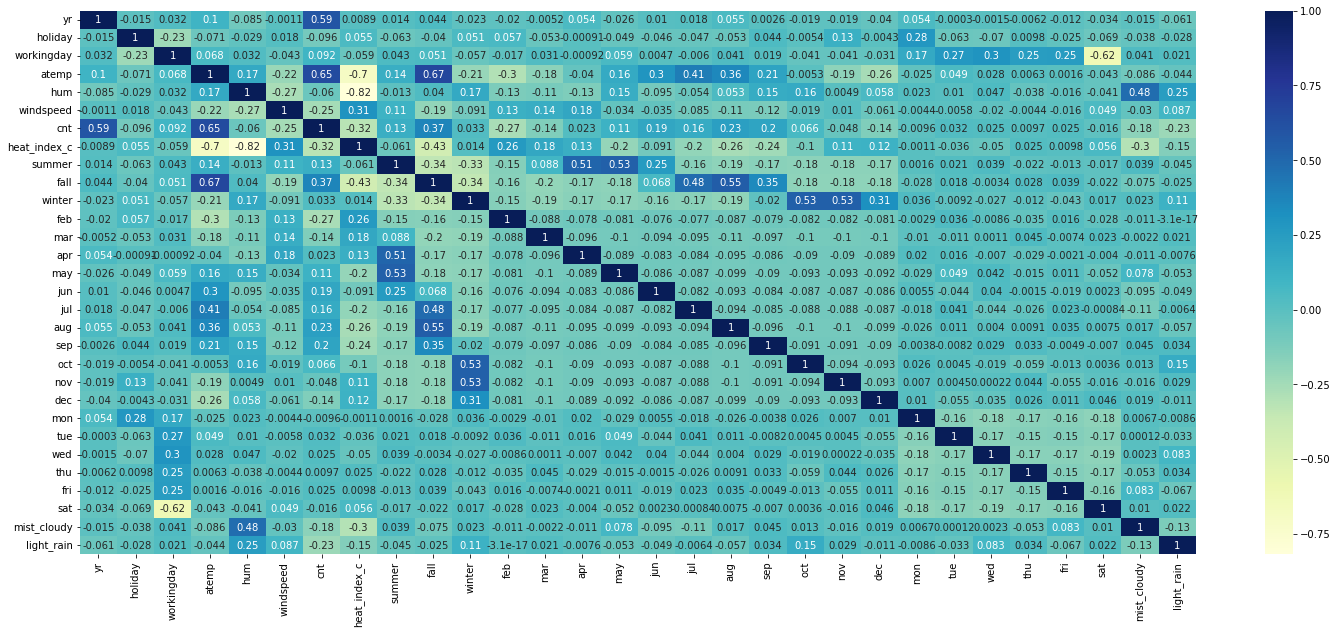

In [84]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Based on above correlation coefficients, atemp and year are most driver variables for bike demand

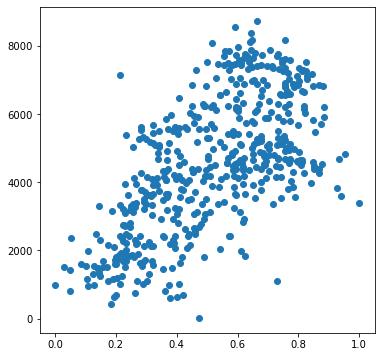

In [85]:
# atemp scatter plot
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

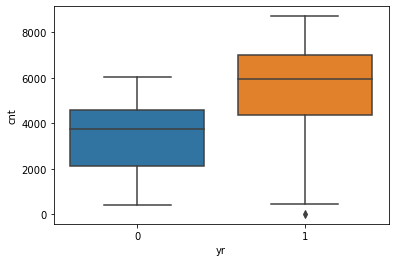

In [90]:
# year box plot
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

#### Keeping dependent variable seperate

In [94]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Lets start building a regression line with `atemp` through the training data using `statsmodels`.

In [96]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const    1438.132256
atemp    5942.135000
dtype: float64


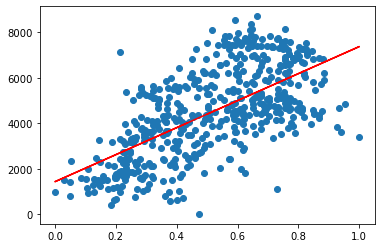

In [97]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1438.132256 + 5942.135000*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [98]:
# Print a summary of the linear regression model obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.10e-61
Time:                        21:03:39   Log-Likelihood:                -4449.3
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1438.1323    172.721      8.326      0.000    1098.796    1777.469
atemp       5942.1350    311.133     19.098      0.000    5330.869    6553.401
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Assign another feature
X_train_lm = X_train[['atemp', 'yr']]

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.07e-131
Time:                        21:04:23   Log-Likelihood:                -4283.9
No. Observations:                 510   AIC:                             8574.
Df Residuals:                     507   BIC:                             8587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        648.7311    130.289      4.979      0.000     392.758     904.704
atemp       5434.5916    226.428     24.001      0.000    4989.740    5879.444
yr          2067.1056     96.097     21.511      0.000    1878.308    2255.904
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Because it is going to take a lot of time for coming to a decent model
### Following the other way where all columns added in the first place and removing one by one which does not have much significance and/or high VIF
### Adding all the variables to the model

## Step 6: Creating model with full set and removing one by one

In [100]:
# Check all the columns of the dataframe

df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'heat_index_c', 'summer', 'fall', 'winter', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed',
       'thu', 'fri', 'sat', 'mist_cloudy', 'light_rain'],
      dtype='object')

In [101]:
#Build a linear model with all columns

X_train_lm = sm.add_constant(X_train)

lr_full = sm.OLS(y_train, X_train_lm).fit()

print(lr_full.params)
print(lr_full.summary())

const          -4412.411711
yr              2023.699671
holiday         -286.550430
workingday       361.205857
atemp           6017.377921
hum             3207.271833
windspeed      -1415.014839
heat_index_c    4916.428004
summer           760.852030
fall             457.229453
winter          1311.715391
feb              267.797738
mar              610.295412
apr              561.312873
may              955.892636
jun              774.520948
jul              508.449041
aug             1043.791702
sep             1510.849814
oct              707.011536
nov              212.594135
dec              147.624310
mon              -93.798444
tue              -53.631358
wed               67.043570
thu               18.827350
fri              136.214308
sat              457.195852
mist_cloudy     -538.365228
light_rain     -2208.596731
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,thu,inf
2,workingday,inf
23,wed,inf
22,tue,inf
21,mon,inf
25,fri,inf
1,holiday,inf
3,atemp,41.47
4,hum,21.34
8,fall,15.33


In [104]:
X_train = X_train.drop('thu', 1,)

In [105]:
#Build a linear model after first removal

X_train_lm = sm.add_constant(X_train)

lr_full_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_full_1.params)
print(lr_full_1.summary())

const          -4412.411711
yr              2023.699671
holiday         -267.723080
workingday       380.033207
atemp           6017.377921
hum             3207.271833
windspeed      -1415.014839
heat_index_c    4916.428004
summer           760.852030
fall             457.229453
winter          1311.715391
feb              267.797738
mar              610.295412
apr              561.312873
may              955.892636
jun              774.520948
jul              508.449041
aug             1043.791702
sep             1510.849814
oct              707.011536
nov              212.594135
dec              147.624310
mon             -112.625794
tue              -72.458708
wed               48.216220
fri              117.386958
sat              457.195852
mist_cloudy     -538.365228
light_rain     -2208.596731
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:         

In [106]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,41.47
4,hum,21.34
8,fall,15.33
9,winter,10.93
16,aug,10.23
2,workingday,10.13
15,jul,9.09
7,summer,8.89
17,sep,7.07
6,heat_index_c,7.05


In [108]:
X_train = X_train.drop('wed', 1,)

In [109]:
#Build a linear model after second removal

X_train_lm = sm.add_constant(X_train)

lr_full_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_full_2.params)
print(lr_full_2.summary())

const          -4402.969544
yr              2023.933224
holiday         -245.175795
workingday       406.516136
atemp           6009.592721
hum             3202.891720
windspeed      -1415.581347
heat_index_c    4906.659109
summer           759.461255
fall             453.873058
winter          1311.784480
feb              269.346856
mar              610.217829
apr              564.555718
may              959.554411
jun              779.529244
jul              513.146346
aug             1048.178548
sep             1514.074988
oct              708.535793
nov              211.992587
dec              146.043318
mon             -138.488364
tue              -98.879487
fri               91.120769
sat              457.434856
mist_cloudy     -538.019766
light_rain     -2207.207295
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj

In [111]:
X_train = X_train.drop('dec', 1,)

In [115]:
#Build a linear model after third removal

X_train_lm = sm.add_constant(X_train)

lr_full_3 = sm.OLS(y_train, X_train_lm).fit()

lr_full_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.76e-182
Time:                        21:44:52   Log-Likelihood:                -4099.1
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8367.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4437.5885   2457.950     -1.805      0.072   -9267.185     392.008
yr            2021.3352     69.922     28.908      0.000    1883.945    2158.725
holiday       -241.2514    253.737     -0.951      0.342    -739.816     257.313
workingday     405.7783    111.779      3.630      0.000     186.145     625.411
atemp         6071.3688   1043.768      5.817      0.000    4020.481    8122.256
hum           3253.2869   1863.248      1.746      0.081    -407.786    6914.360
windspeed    -1404.4461    223.989     -6.270      0.000   -1844.560    -964.332
heat_index_c  4954.5511   2015.083      2.459      0.014     995.140    8913.962
summer         784.1484    201.494      3.892      0.000     388.236    1180.061
fall           507.4042    246.191      2.061      0.040      23.667     991.142
winter        1407.0302    168.943      8.328      0.000    1075.076    1738.984
feb            229.4762    167.806      1.368      0.172    -100.244     559.196
mar            556.9088    173.306      3.213      0.001     216.382     897.435
apr            491.6979    267.883      1.835      0.067     -34.662    1018.058
may            882.5132    281.954      3.130      0.002     328.505    1436.521
jun            687.4236    292.617      2.349      0.019     112.464    1262.384
jul            400.3940    326.556      1.226      0.221    -241.253    1042.041
aug            938.6663    308.180      3.046      0.002     333.126    1544.206
sep           1398.2429    264.080      5.295      0.000     879.356    1917.130
oct            564.5106    191.894      2.942      0.003     187.460     941.561
nov             72.5845    181.577      0.400      0.690    -284.194     429.363
mon           -140.6978    112.189     -1.254      0.210    -361.137      79.741
tue           -100.9198    114.379     -0.882      0.378    -325.662     123.822
fri             91.8559    115.951      0.792      0.429    -135.974     319.686
sat            457.9948    126.455      3.622      0.000     209.526     706.464
mist_cloudy   -540.4202     90.632     -5.963      0.000    -718.503    -362.338
light_rain   -2208.0256    229.750     -9.611      0.000   -2659.459   -1756.592
==============================================================================
Omnibus:                       90.644   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.639
Skew:                          -0.806   Prob(JB):                     2.34e-65
Kurtosis:                       6.377   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# nov
X_train = X_train.drop('nov', 1,)

In [118]:
#Build a linear model after fourth removal

X_train_lm = sm.add_constant(X_train)

lr_full_4 = sm.OLS(y_train, X_train_lm).fit()

lr_full_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.80e-183
Time:                        21:47:16   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     484   BIC:                             8360.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4417.7436   2455.315     -1.799      0.073   -9242.137     406.649
yr            2020.7775     69.848     28.931      0.000    1883.535    2158.020
holiday       -231.0793    252.239     -0.916      0.360    -726.697     264.539
workingday     405.4820    111.679      3.631      0.000     186.046     624.918
atemp         6081.6199   1042.547      5.833      0.000    4033.142    8130.097
hum           3230.8710   1860.787      1.736      0.083    -425.347    6887.089
windspeed    -1396.5914    222.932     -6.265      0.000   -1834.626    -958.557
heat_index_c  4938.7251   2012.944      2.453      0.014     983.537    8893.914
summer         794.0977    199.777      3.975      0.000     401.560    1186.635
fall           528.1952    240.425      2.197      0.028      55.789    1000.601
winter        1445.0726    139.467     10.361      0.000    1171.036    1719.109
feb            225.6750    167.391      1.348      0.178    -103.228     554.578
mar            548.2558    171.799      3.191      0.002     210.691     885.820
apr            474.7590    264.281      1.796      0.073     -44.520     994.038
may            864.8109    278.213      3.108      0.002     318.157    1411.465
jun            663.4192    286.141      2.319      0.021     101.188    1225.651
jul            368.3173    316.269      1.165      0.245    -253.113     989.748
aug            908.1138    298.293      3.044      0.002     322.004    1494.223
sep           1365.1699    250.567      5.448      0.000     872.836    1857.503
oct            520.6125    157.229      3.311      0.001     211.677     829.548
mon           -143.0201    111.941     -1.278      0.202    -362.971      76.931
tue           -100.6229    114.277     -0.881      0.379    -325.164     123.918
fri             89.9612    115.753      0.777      0.437    -137.480     317.402
sat            456.1008    126.256      3.613      0.000     208.023     704.179
mist_cloudy   -539.6171     90.531     -5.961      0.000    -717.500    -361.734
light_rain   -2204.4877    229.380     -9.611      0.000   -2655.192   -1753.783
==============================================================================
Omnibus:                       89.724   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.472
Skew:                          -0.799   Prob(JB):                     1.88e-64
Kurtosis:                       6.355   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# fri
X_train = X_train.drop('fri', 1,)

In [121]:
#Build a linear model after fifth removal

X_train_lm = sm.add_constant(X_train)

lr_full_5 = sm.OLS(y_train, X_train_lm).fit()

lr_full_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.46e-184
Time:                        21:49:08   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     485   BIC:                             8355.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4411.4604   2454.299     -1.797      0.073   -9233.832     410.912
yr            2020.3136     69.817     28.937      0.000    1883.133    2157.494
holiday       -201.5823    249.265     -0.809      0.419    -691.355     288.190
workingday     433.2808    105.753      4.097      0.000     225.490     641.072
atemp         6066.9136   1041.950      5.823      0.000    4019.620    8114.207
hum           3224.4395   1860.009      1.734      0.084    -430.231    6879.110
windspeed    -1397.8520    222.835     -6.273      0.000   -1835.694    -960.010
heat_index_c  4937.9372   2012.122      2.454      0.014     984.385    8891.490
summer         791.7633    199.673      3.965      0.000     399.432    1184.094
fall           528.4355    240.327      2.199      0.028      56.225    1000.646
winter        1445.5394    139.409     10.369      0.000    1171.619    1719.460
feb            229.5613    167.248      1.373      0.171     -99.059     558.181
mar            550.4101    171.707      3.206      0.001     213.029     887.791
apr            482.2868    263.995      1.827      0.068     -36.429    1001.002
may            872.7537    277.912      3.140      0.002     326.694    1418.813
jun            670.1159    285.894      2.344      0.019     108.372    1231.860
jul            381.9468    315.654      1.210      0.227    -238.271    1002.164
aug            917.4517    297.929      3.079      0.002     332.060    1502.844
sep           1369.5420    250.402      5.469      0.000     877.536    1861.548
oct            527.8271    156.891      3.364      0.001     219.558     836.097
mon           -170.7043    106.079     -1.609      0.108    -379.136      37.727
tue           -128.5802    108.424     -1.186      0.236    -341.618      84.458
sat            456.2612    126.204      3.615      0.000     208.286     704.236
mist_cloudy   -534.5257     90.257     -5.922      0.000    -711.869    -357.182
light_rain   -2217.4759    228.677     -9.697      0.000   -2666.797   -1768.155
==============================================================================
Omnibus:                       89.009   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.490
Skew:                          -0.789   Prob(JB):                     1.13e-64
Kurtosis:                       6.372   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# holiday
X_train = X_train.drop('holiday', 1,)

In [124]:
#Build a linear model after sixth removal

X_train_lm = sm.add_constant(X_train)

lr_full_6 = sm.OLS(y_train, X_train_lm).fit()

lr_full_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.28e-185
Time:                        21:51:21   Log-Likelihood:                -4099.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     486   BIC:                             8349.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4548.3766   2447.581     -1.858      0.064   -9357.524     260.770
yr            2022.2939     69.749     28.994      0.000    1885.247    2159.341
workingday     466.5756     97.375      4.792      0.000     275.247     657.904
atemp         6083.5220   1041.377      5.842      0.000    4037.366    8129.678
hum           3314.2544   1856.029      1.786      0.075    -332.577    6961.086
windspeed    -1398.4109    222.755     -6.278      0.000   -1836.092    -960.729
heat_index_c  5022.2971   2008.701      2.500      0.013    1075.487    8969.107
summer         789.0975    199.575      3.954      0.000     396.962    1181.233
fall           523.9195    240.177      2.181      0.030      52.007     995.832
winter        1448.4695    139.312     10.397      0.000    1174.740    1722.199
feb            231.4156    167.173      1.384      0.167     -97.055     559.886
mar            562.9749    170.942      3.293      0.001     227.099     898.851
apr            496.3716    263.326      1.885      0.060     -21.027    1013.770
may            892.0403    276.788      3.223      0.001     348.192    1435.889
jun            694.8682    284.150      2.445      0.015     136.554    1253.182
jul            410.7246    313.530      1.310      0.191    -205.317    1026.766
aug            941.5854    296.326      3.178      0.002     359.348    1523.823
sep           1381.4600    249.879      5.529      0.000     890.484    1872.436
oct            538.1897    156.311      3.443      0.001     231.061     845.318
mon           -199.3475     99.956     -1.994      0.047    -395.747      -2.948
tue           -135.5796    108.039     -1.255      0.210    -347.861      76.702
sat            482.6308    121.876      3.960      0.000     243.162     722.100
mist_cloudy   -534.6639     90.225     -5.926      0.000    -711.943    -357.385
light_rain   -2219.0027    228.588     -9.707      0.000   -2668.146   -1769.860
==============================================================================
Omnibus:                       92.656   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.292
Skew:                          -0.815   Prob(JB):                     9.32e-69
Kurtosis:                       6.476   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# tue
X_train = X_train.drop('tue', 1,)

In [127]:
#Build a linear model after seventh removal

X_train_lm = sm.add_constant(X_train)

lr_full_7 = sm.OLS(y_train, X_train_lm).fit()

lr_full_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.18e-186
Time:                        21:54:15   Log-Likelihood:                -4100.7
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     487   BIC:                             8345.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4589.7601   2448.803     -1.874      0.061   -9401.283     221.763
yr            2022.4690     69.790     28.979      0.000    1885.342    2159.596
workingday     436.8834     94.513      4.622      0.000     251.180     622.587
atemp         6096.1176   1041.943      5.851      0.000    4048.860    8143.375
hum           3344.1867   1856.971      1.801      0.072    -304.477    6992.850
windspeed    -1402.5653    222.862     -6.293      0.000   -1840.454    -964.676
heat_index_c  5066.1198   2009.582      2.521      0.012    1117.598    9014.641
summer         787.8689    199.690      3.945      0.000     395.509    1180.229
fall           524.3124    240.318      2.182      0.030      52.124     996.501
winter        1443.3730    139.335     10.359      0.000    1169.600    1717.146
feb            218.8113    166.969      1.310      0.191    -109.258     546.880
mar            561.6962    171.039      3.284      0.001     225.630     897.763
apr            490.1252    263.435      1.861      0.063     -27.483    1007.734
may            888.1380    276.934      3.207      0.001     344.006    1432.270
jun            701.3607    284.270      2.467      0.014     142.813    1259.909
jul            403.6807    313.665      1.287      0.199    -212.622    1019.984
aug            941.6943    296.500      3.176      0.002     359.116    1524.272
sep           1382.8839    250.023      5.531      0.000     891.626    1874.142
oct            535.4803    156.388      3.424      0.001     228.201     842.759
mon           -171.2282     97.470     -1.757      0.080    -362.741      20.285
sat            484.1171    121.942      3.970      0.000     244.520     723.715
mist_cloudy   -531.6298     90.246     -5.891      0.000    -708.949    -354.311
light_rain   -2202.7031    228.353     -9.646      0.000   -2651.383   -1754.023
==============================================================================
Omnibus:                       93.505   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.894
Skew:                          -0.811   Prob(JB):                     6.29e-72
Kurtosis:                       6.577   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# jul
X_train = X_train.drop('jul', 1,)

In [129]:
#Build a linear model after eighth removal

X_train_lm = sm.add_constant(X_train)

lr_full_8 = sm.OLS(y_train, X_train_lm).fit()

lr_full_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.59e-186
Time:                        22:00:07   Log-Likelihood:                -4101.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     488   BIC:                             8340.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4377.3894   2444.879     -1.790      0.074   -9181.178     426.400
yr            2018.8632     69.781     28.932      0.000    1881.756    2155.971
workingday     436.5072     94.576      4.615      0.000     250.681     622.333
atemp         6273.1445   1033.518      6.070      0.000    4242.451    8303.838
hum           3120.1914   1850.039      1.687      0.092    -514.834    6755.217
windspeed    -1406.1058    222.994     -6.306      0.000   -1844.254    -967.958
heat_index_c  4884.1167   2005.947      2.435      0.015     942.757    8825.477
summer         871.0957    189.056      4.608      0.000     499.632    1242.560
fall           695.3890    200.341      3.471      0.001     301.751    1089.027
winter        1414.6208    137.625     10.279      0.000    1144.210    1685.032
feb            188.6805    165.431      1.141      0.255    -136.364     513.725
mar            469.9334    155.574      3.021      0.003     164.256     775.611
apr            323.9747    229.786      1.410      0.159    -127.518     775.467
may            688.0991    229.355      3.000      0.003     237.454    1138.744
jun            436.8137    196.490      2.223      0.027      50.743     822.884
aug            618.2131    157.384      3.928      0.000     308.980     927.446
sep           1128.1915    152.902      7.379      0.000     827.763    1428.620
oct            479.5003    150.318      3.190      0.002     184.149     774.851
mon           -172.1924     97.532     -1.765      0.078    -363.827      19.442
sat            489.8425    121.943      4.017      0.000     250.245     729.440
mist_cloudy   -524.8492     90.152     -5.822      0.000    -701.984    -347.714
light_rain   -2188.7981    228.251     -9.589      0.000   -2637.274   -1740.322
==============================================================================
Omnibus:                       90.026   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.433
Skew:                          -0.787   Prob(JB):                     1.06e-67
Kurtosis:                       6.470   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# feb
X_train = X_train.drop('feb', 1,)

In [132]:
#Build a linear model after ninth removal

X_train_lm = sm.add_constant(X_train)

lr_full_9 = sm.OLS(y_train, X_train_lm).fit()

lr_full_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.54e-187
Time:                        22:02:14   Log-Likelihood:                -4102.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     489   BIC:                             8335.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4422.4316   2445.312     -1.809      0.071   -9227.047     382.183
yr            2018.0141     69.798     28.912      0.000    1880.873    2155.155
workingday     434.5270     94.589      4.594      0.000     248.676     620.378
atemp         6338.1047   1032.264      6.140      0.000    4309.884    8366.326
hum           3183.9815   1849.762      1.721      0.086    -450.481    6818.444
windspeed    -1388.1622    222.507     -6.239      0.000   -1825.350    -950.974
heat_index_c  4980.2904   2004.791      2.484      0.013    1041.223    8919.358
summer         844.8653    187.710      4.501      0.000     476.048    1213.682
fall           629.2767    191.831      3.280      0.001     252.361    1006.192
winter        1348.0411    124.670     10.813      0.000    1103.087    1592.996
mar            409.4924    146.315      2.799      0.005     122.009     696.976
apr            276.9039    226.119      1.225      0.221    -167.381     721.189
may            645.0536    226.298      2.850      0.005     200.417    1089.690
jun            403.8313    194.410      2.077      0.038      21.849     785.813
aug            613.9098    157.387      3.901      0.000     304.672     923.148
sep           1125.9228    152.936      7.362      0.000     825.429    1426.416
oct            476.9157    150.348      3.172      0.002     181.509     772.323
mon           -172.9728     97.560     -1.773      0.077    -364.661      18.715
sat            482.2846    121.800      3.960      0.000     242.969     721.601
mist_cloudy   -522.9473     90.165     -5.800      0.000    -700.105    -345.789
light_rain   -2175.5839    228.027     -9.541      0.000   -2623.617   -1727.550
==============================================================================
Omnibus:                       90.515   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.568
Skew:                          -0.793   Prob(JB):                     9.89e-68
Kurtosis:                       6.465   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# apr
X_train = X_train.drop('apr', 1,)

#Build a linear model after tenth removal

X_train_lm = sm.add_constant(X_train)

lr_full_10 = sm.OLS(y_train, X_train_lm).fit()

lr_full_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.35e-188
Time:                        22:04:25   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     490   BIC:                             8331.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4878.0121   2418.078     -2.017      0.044   -9629.094    -126.930
yr            2019.0464     69.829     28.914      0.000    1881.846    2156.247
workingday     433.1642     94.631      4.577      0.000     247.232     619.096
atemp         6566.8901   1015.735      6.465      0.000    4571.157    8562.623
hum           3506.5325   1831.846      1.914      0.056     -92.711    7105.776
windspeed    -1361.7808    221.575     -6.146      0.000   -1797.135    -926.427
heat_index_c  5374.4448   1979.793      2.715      0.007    1484.513    9264.376
summer        1005.9354    133.989      7.508      0.000     742.671    1269.200
fall           625.4298    191.903      3.259      0.001     248.375    1002.485
winter        1326.0564    123.433     10.743      0.000    1083.533    1568.580
mar            324.2517    128.762      2.518      0.012      71.257     577.246
may            457.0298    166.326      2.748      0.006     130.229     783.831
jun            265.8017    158.481      1.677      0.094     -45.584     577.188
aug            588.9413    156.140      3.772      0.000     282.155     895.728
sep           1109.4490    152.421      7.279      0.000     809.969    1408.929
oct            472.0824    150.372      3.139      0.002     176.628     767.537
mon           -173.2526     97.609     -1.775      0.077    -365.037      18.532
sat            477.5711    121.801      3.921      0.000     238.254     716.888
mist_cloudy   -520.2967     90.185     -5.769      0.000    -697.493    -343.100
light_rain   -2170.1333    228.100     -9.514      0.000   -2618.308   -1721.959
==============================================================================
Omnibus:                       91.663   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.183
Skew:                          -0.802   Prob(JB):                     5.97e-69
Kurtosis:                       6.495   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# jun
X_train = X_train.drop('jun', 1,)

#Build a linear model after eleventh removal

X_train_lm = sm.add_constant(X_train)

lr_full_11 = sm.OLS(y_train, X_train_lm).fit()

lr_full_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.39e-188
Time:                        22:06:52   Log-Likelihood:                -4104.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     491   BIC:                             8327.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4886.7111   2422.533     -2.017      0.044   -9646.521    -126.901
yr            2012.1648     69.837     28.813      0.000    1874.950    2149.380
workingday     434.7051     94.801      4.585      0.000     248.440     620.970
atemp         6748.8433   1011.787      6.670      0.000    4760.877    8736.810
hum           3467.6096   1835.078      1.890      0.059    -137.965    7073.184
windspeed    -1385.5086    221.530     -6.254      0.000   -1820.773    -950.244
heat_index_c  5376.3181   1983.445      2.711      0.007    1479.232    9273.404
summer        1038.4480    132.824      7.818      0.000     777.474    1299.422
fall           589.8036    191.076      3.087      0.002     214.376     965.231
winter        1300.5788    122.721     10.598      0.000    1059.456    1541.702
mar            281.4238    126.438      2.226      0.026      32.998     529.850
may            354.6226    154.999      2.288      0.023      50.080     659.166
aug            530.8719    152.534      3.480      0.001     231.172     830.571
sep           1065.8366    150.464      7.084      0.000     770.204    1361.469
oct            449.1324    150.025      2.994      0.003     154.363     743.902
mon           -172.1994     97.787     -1.761      0.079    -364.332      19.934
sat            480.7023    122.012      3.940      0.000     240.973     720.432
mist_cloudy   -518.1856     90.342     -5.736      0.000    -695.691    -340.681
light_rain   -2166.4896    228.510     -9.481      0.000   -2615.468   -1717.511
==============================================================================
Omnibus:                       91.492   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.010
Skew:                          -0.813   Prob(JB):                     2.63e-66
Kurtosis:                       6.402   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# mon
X_train = X_train.drop('mon', 1,)

#Build a linear model after twelveth removal

X_train_lm = sm.add_constant(X_train)

lr_full_12 = sm.OLS(y_train, X_train_lm).fit()

lr_full_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.01e-189
Time:                        22:08:39   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     492   BIC:                             8324.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4947.0425   2427.457     -2.038      0.042   -9716.504    -177.581
yr            2005.5095     69.883     28.698      0.000    1868.204    2142.815
workingday     419.7284     94.620      4.436      0.000     233.820     605.637
atemp         6786.2618   1013.722      6.694      0.000    4794.504    8778.019
hum           3484.9895   1838.965      1.895      0.059    -128.205    7098.184
windspeed    -1388.5276    221.996     -6.255      0.000   -1824.705    -952.350
heat_index_c  5419.2738   1987.525      2.727      0.007    1514.191    9324.357
summer        1031.1144    133.042      7.750      0.000     769.714    1292.515
fall           585.8745    191.470      3.060      0.002     209.674     962.075
winter        1296.2272    122.958     10.542      0.000    1054.640    1537.814
mar            284.8646    126.692      2.248      0.025      35.940     533.789
may            367.7915    155.149      2.371      0.018      62.956     672.627
aug            536.1258    152.830      3.508      0.000     235.846     836.406
sep           1068.1954    150.779      7.085      0.000     771.946    1364.445
oct            445.2904    150.329      2.962      0.003     149.925     740.656
sat            499.3738    121.809      4.100      0.000     260.043     738.704
mist_cloudy   -514.9167     90.516     -5.689      0.000    -692.762    -337.071
light_rain   -2155.1169    228.906     -9.415      0.000   -2604.871   -1705.363
==============================================================================
Omnibus:                       91.518   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.054
Skew:                          -0.809   Prob(JB):                     3.48e-67
Kurtosis:                       6.433   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# hum
X_train = X_train.drop('hum', 1,)

#Build a linear model after thirteenth removal

X_train_lm = sm.add_constant(X_train)

lr_full_13 = sm.OLS(y_train, X_train_lm).fit()

lr_full_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.23e-189
Time:                        22:09:51   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     493   BIC:                             8322.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -380.6785    294.775     -1.291      0.197    -959.849     198.492
yr            2012.7034     69.963     28.768      0.000    1875.241    2150.166
workingday     432.0610     94.644      4.565      0.000     246.107     618.016
atemp         5004.4164    379.896     13.173      0.000    4258.002    5750.831
windspeed    -1439.4901    220.940     -6.515      0.000   -1873.590   -1005.390
heat_index_c  1713.2414    355.700      4.817      0.000    1014.367    2412.116
summer        1047.0714    133.124      7.865      0.000     785.511    1308.632
fall           575.1318    191.889      2.997      0.003     198.111     952.153
winter        1325.8596    122.279     10.843      0.000    1085.607    1566.113
mar            281.8559    127.015      2.219      0.027      32.299     531.413
may            335.7220    154.628      2.171      0.030      31.911     639.533
aug            494.0819    151.608      3.259      0.001     196.205     791.959
sep           1027.5608    149.638      6.867      0.000     733.554    1321.568
oct            439.5937    150.693      2.917      0.004     143.514     735.674
sat            512.0713    121.944      4.199      0.000     272.477     751.665
mist_cloudy   -502.1480     90.502     -5.548      0.000    -679.964    -324.332
light_rain   -2126.5833    229.010     -9.286      0.000   -2576.539   -1676.628
==============================================================================
Omnibus:                       88.599   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.843
Skew:                          -0.796   Prob(JB):                     2.31e-62
Kurtosis:                       6.290   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,16.29
6,fall,7.94
4,heat_index_c,5.78
3,windspeed,5.42
1,workingday,4.99
5,summer,3.63
7,winter,3.09
0,yr,2.11
13,sat,1.93
10,aug,1.86


In [138]:
# atemp
X_train = X_train.drop('atemp', 1,)

#Build a linear model after fourteenth removal

X_train_lm = sm.add_constant(X_train)

lr_full_14 = sm.OLS(y_train, X_train_lm).fit()

lr_full_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     126.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.38e-158
Time:                        22:12:29   Log-Likelihood:                -4184.8
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     494   BIC:                             8469.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2547.8670    224.847     11.332      0.000    2106.092    2989.642
yr            2162.1857     80.191     26.963      0.000    2004.628    2319.743
workingday     495.0503    109.795      4.509      0.000     279.327     710.773
windspeed    -1207.7515    255.823     -4.721      0.000   -1710.387    -705.116
heat_index_c -1217.9389    322.346     -3.778      0.000   -1851.277    -584.601
summer        1903.6156    134.933     14.108      0.000    1638.502    2168.729
fall          2198.7131    170.838     12.870      0.000    1863.055    2534.371
winter        1638.0873    139.343     11.756      0.000    1364.310    1911.865
mar            412.5776    147.086      2.805      0.005     123.586     701.569
may            455.9439    179.298      2.543      0.011     103.663     808.225
aug            320.2434    175.435      1.825      0.069     -24.448     664.935
sep            783.8152    172.482      4.544      0.000     444.927    1122.703
oct            749.4193    172.896      4.335      0.000     409.717    1089.122
sat            591.3021    141.475      4.180      0.000     313.336     869.268
mist_cloudy  -1001.0924     95.475    -10.485      0.000   -1188.680    -813.505
light_rain   -3027.1236    253.883    -11.923      0.000   -3525.948   -2528.299
==============================================================================
Omnibus:                       64.333   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.414
Skew:                          -0.639   Prob(JB):                     1.20e-36
Kurtosis:                       5.481   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# aug
X_train = X_train.drop('aug', 1,)

#Build a linear model after fifteenth removal

X_train_lm = sm.add_constant(X_train)

lr_full_15 = sm.OLS(y_train, X_train_lm).fit()

lr_full_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.05e-158
Time:                        22:13:32   Log-Likelihood:                -4186.5
No. Observations:                 510   AIC:                             8403.
Df Residuals:                     495   BIC:                             8467.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2555.8959    225.333     11.343      0.000    2113.169    2998.623
yr            2167.3790     80.329     26.981      0.000    2009.551    2325.207
workingday     503.2726    109.961      4.577      0.000     287.225     719.320
windspeed    -1206.6787    256.424     -4.706      0.000   -1710.493    -702.864
heat_index_c -1258.1382    322.349     -3.903      0.000   -1891.480    -624.797
summer        1898.3383    135.220     14.039      0.000    1632.663    2164.014
fall          2332.8124    154.599     15.089      0.000    2029.061    2636.564
winter        1646.4597    139.595     11.795      0.000    1372.188    1920.731
mar            411.7252    147.432      2.793      0.005     122.056     701.394
may            448.3145    179.671      2.495      0.013      95.302     801.327
sep            664.4032    159.971      4.153      0.000     350.098     978.709
oct            734.2101    173.102      4.241      0.000     394.106    1074.314
sat            603.6567    141.645      4.262      0.000     325.357     881.957
mist_cloudy   -990.8725     95.535    -10.372      0.000   -1178.577    -803.168
light_rain   -3046.6519    254.255    -11.983      0.000   -3546.203   -2547.101
==============================================================================
Omnibus:                       64.374   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.590
Skew:                          -0.649   Prob(JB):                     1.34e-35
Kurtosis:                       5.423   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,heat_index_c,5.74
2,windspeed,5.18
1,workingday,4.57
6,winter,2.39
4,summer,2.33
5,fall,2.15
0,yr,2.00
11,sat,1.84
8,may,1.62
12,mist_cloudy,1.62


In [141]:
# heat_index_c
X_train = X_train.drop('heat_index_c', 1,)

#Build a linear model after sixteenth removal

X_train_lm = sm.add_constant(X_train)

lr_full_16 = sm.OLS(y_train, X_train_lm).fit()

lr_full_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.50e-156
Time:                        22:14:52   Log-Likelihood:                -4194.3
No. Observations:                 510   AIC:                             8417.
Df Residuals:                     496   BIC:                             8476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1938.6198    162.794     11.908      0.000    1618.769    2258.471
yr           2161.7909     81.461     26.538      0.000    2001.741    2321.841
workingday    481.8888    111.389      4.326      0.000     263.037     700.741
windspeed   -1467.0530    251.122     -5.842      0.000   -1960.447    -973.659
summer       2058.9222    130.643     15.760      0.000    1802.240    2315.605
fall         2673.1664    129.477     20.646      0.000    2418.775    2927.558
winter       1764.7636    138.206     12.769      0.000    1493.223    2036.305
mar           432.9909    149.430      2.898      0.004     139.397     726.584
may           614.5247    177.039      3.471      0.001     266.687     962.363
sep           717.1337    161.670      4.436      0.000     399.491    1034.777
oct           853.1768    172.824      4.937      0.000     513.619    1192.735
sat           567.4807    143.355      3.959      0.000     285.822     849.139
mist_cloudy  -827.2345     87.067     -9.501      0.000    -998.300    -656.169
light_rain  -2771.6571    247.778    -11.186      0.000   -3258.481   -2284.833
==============================================================================
Omnibus:                       61.852   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.562
Skew:                          -0.613   Prob(JB):                     2.25e-35
Kurtosis:                       5.451   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.78
2,windspeed,3.39
3,summer,2.33
5,winter,2.33
4,fall,2.08
0,yr,1.94
10,sat,1.64
7,may,1.60
9,oct,1.57
11,mist_cloudy,1.54


### Conclusion: As we have got all significant variables and low VIF values, we are good with this model

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed 
(which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

In [144]:
y_train_cnt = lr_full_16.predict(X_train_lm)

Text(0.5, 0, 'Errors')

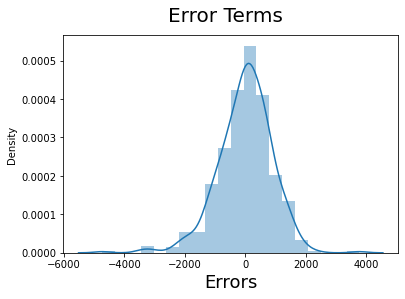

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

### Conclusion: As we have got normally distributed graph and their mean at zero, we can conclude that our assumption holds good

#### Applying the scaling on the test sets

In [147]:
num_vars = ['atemp', 'hum', 'windspeed', 'heat_index_c']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [148]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,heat_index_c,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist_cloudy,light_rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,4546.981735,0.376389,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,1898.633630,0.183330,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,-0.000839,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,3303.500000,0.236399,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,4579.000000,0.365832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,5869.500000,0.537334,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,0.768480,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [149]:
y_test = df_test.pop('cnt')
X_test = df_test

In [150]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [151]:
X_test_lm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,heat_index_c,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist_cloudy,light_rain
184,1.0,0,1,0,0.769660,0.657364,0.084219,0.233132,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0.244974,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0.216807,0,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0.469850,0,1,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0.628730,1,0,...,0,0,0,0,0,1,0,0,0,0


In [153]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm
# 'thu', 'wed', 'dec', 'nov', 'fri', 'holiday', 'tue', 'jul', 'feb', 'apr', 'jun', 'mon', 'hum', 'atemp', 'aug', 'heat_index_c'

X_test_lm = X_test_lm.drop(['thu', 'wed', 'dec', 'nov', 'fri', 'holiday', 'tue', 'jul', 'feb', 'apr', 'jun', 'mon', 'hum', 'atemp', 'aug', 'heat_index_c'], axis = 1)

In [154]:
X_test_lm

,const,yr,workingday,windspeed,summer,fall,winter,mar,may,sep,oct,sat,mist_cloudy,light_rain
184,1.0,0,0,0.084219,0,1,0,0,0,0,0,0,1,0
535,1.0,1,1,0.153728,1,0,0,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,1,0,1,0
221,1.0,0,1,0.339570,0,1,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.287411,0,0,0,0,0,0,0,0,1,0
702,1.0,1,1,0.283397,0,0,1,0,0,0,0,0,0,0
127,1.0,0,0,0.069510,1,0,0,0,1,0,0,0,0,0
640,1.0,1,1,0.052115,0,0,1,0,0,0,1,0,1,0


In [155]:
# Making predictions using the final model
y_test_pred = lr_full_16.predict(X_test_lm)

In [156]:
from sklearn.metrics import r2_score

In [157]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7749671261770056

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

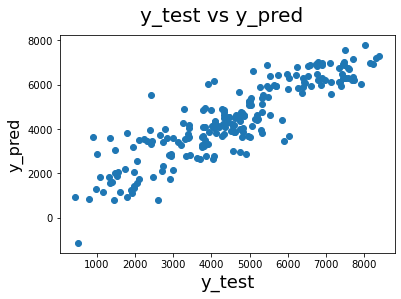

In [158]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### Conclusion: we have got good model. But it took lot of iterations for coming to final model.
### So, we can use this number of variables for building model with RFE which is automated way of finding features

In [160]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [161]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [162]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('mar', True, 1),
 ('may', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('sat', True, 1),
 ('mist_cloudy', True, 1),
 ('light_rain', True, 1)]

In [163]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'windspeed', 'summer', 'fall', 'winter', 'mar',
       'may', 'sep', 'oct', 'sat', 'mist_cloudy', 'light_rain'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [165]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [166]:
#Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [167]:
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()   # Running the linear model

In [168]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.50e-156
Time:                        23:18:33   Log-Likelihood:                -4194.3
No. Observations:                 510   AIC:                             8417.
Df Residuals:                     496   BIC:                             8476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1938.6198    162.794     11.908      0.000    1618.769    2258.471
yr           2161.7909     81.461     26.538      0.000    2001.741    2321.841
workingday    481.8888    111.389      4.326      0.000     263.037     700.741
windspeed   -1467.0530    251.122     -5.842      0.000   -1960.447    -973.659
summer       2058.9222    130.643     15.760      0.000    1802.240    2315.605
fall         2673.1664    129.477     20.646      0.000    2418.775    2927.558
winter       1764.7636    138.206     12.769      0.000    1493.223    2036.305
mar           432.9909    149.430      2.898      0.004     139.397     726.584
may           614.5247    177.039      3.471      0.001     266.687     962.363
sep           717.1337    161.670      4.436      0.000     399.491    1034.777
oct           853.1768    172.824      4.937      0.000     513.619    1192.735
sat           567.4807    143.355      3.959      0.000     285.822     849.139
mist_cloudy  -827.2345     87.067     -9.501      0.000    -998.300    -656.169
light_rain  -2771.6571    247.778    -11.186      0.000   -3258.481   -2284.833
==============================================================================
Omnibus:                       61.852   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.562
Skew:                          -0.613   Prob(JB):                     2.25e-35
Kurtosis:                       5.451   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [171]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.78
2,windspeed,3.39
3,summer,2.33
5,winter,2.33
4,fall,2.08
0,yr,1.94
10,sat,1.64
7,may,1.60
9,oct,1.57
11,mist_cloudy,1.54


## Making Predictions
### Applying the scaling on the test sets

In [172]:
num_vars = ['atemp', 'hum', 'windspeed', 'heat_index_c']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [173]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [174]:
# Making predictions
y_pred_test_rfe = lm_rfe.predict(X_test_new)

Text(0, 0.5, 'y_pred')

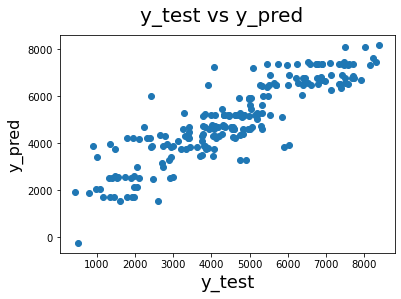

In [175]:
# Plotting y_test and y_pred_test_rfe to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### Conclusion: we have got good model this time with RFE also and its matching with the results manually generated features.